# SISTEM PENDUKUNG KEPUTUSAN PEMILIHAN TELEPON SELULER MENGGUNAKAN METODE FUZZY MAMDANI 

Logika Fuzzy merupakan suatu cara yang tepat untuk memetakan suatu ruang masukan (input) ke dalam suatu ruang keluaran (output). (Heru Dibyo Laksono & Hansi Effendi, 2011). Adapun alasan menggunakan logika fuzzy pada paper ini antara lain; Konsep logika fuzzy lebih mudah dipahami dan logika fuzzy jika terdapat data yang ambigu memiliki toleransi. Secara umum, sistem logika fuzzy memiliki 4 elemen yaitu;

1. Basis aturan yang berisi aturan-aturan yang bersumber dari pakar.
2. Suatu mekanisme pengambilan keputusan dimana pakar mengambil
keputusan dengan menerapkan pengetahuan yang dimiliki.
3. Proses fuzzifikasi (fuzzification) yang merubah besaran tegas (crisp) ke
dalam besaran fuzzy;
4. Proses defuzzifikasi (defuzzification), merupakan kebalikan dari proses
fuzzikasi yaitu merubah besaran fuzzy hasil dari inference engine, menjadi besaran tegas (crisp).


**LATAR BELAKANG SISTEM**

Banyaknya  jenis  telepon seluler yang  tersedia  dipasaran  membuat para konsumen  menjadi  kesulitan  untuk  menentukan pilihannya. Permasalahan  yang  dipilih adalah  membangun sistem  pendukung  pengambilan  keputusan  untuk membantu  memberikan pilihan  ponsel  bagi  para konsumen  berdasarkan  kriteria-kriteria  yang diinginkan oleh konsumen tersebut.  Kriteria  yang  digunakan  dalam  membantu menentukan  pilihan  ponsel  yang  diinginkan konsumen  antara  lain  berdasarkan  pada  harga dan kualitas kamera yang dijadikan sebagai input dalam sistem fuzzy yang akan dibuat. Penentuan keputusan untuk membantu memberikan pilihan  ponsel berdasarkan kriteria-kriteria yang diinginkan oleh para konsumen pada umumnya merupakan output dari sistem ini.

**Antecedents (Inputs)**


o  Harga Ponsel
	
         Fuzzy set:  Murah  (100-4000)
                     Normal (2000-8000)
                     Mahal  (4000-20000)
  
o  Kamera Ponsel
	
         Fuzzy set:  Buram  (1-2)
                     Sedang (1-4)
                     Jernih (2-6) 
                  
**Consequents (Outputs)**
    
o  Penentuan Keputusan Pemilihan Telepon Seluler
	
         Fuzzy set:  Kurang Direkomendasi  (1-40)
                     Dipertimbangkan       (20-80)
                     Sangat Direkomendasi  (40-100)


# IMPORT LIBRARY FUZZY
Library numpy adalah kumpulan function perhitungan dasar untuk bahasa Python. Library skfuzzy adalah kumpulan function fuzzy logic untuk bahasa Python. Library matplotlib digunakan untuk plotting hasil dalam bentuk visual (gambar).

In [244]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# FUZZYFIKASI
Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)


## A. Variabel Linguistik Untuk Input

In [245]:
harga = ctrl.Antecedent(np.arange(100, 20000, 100), 'harga')
harga_x = np.arange(100,20000,100) #untuk plotting saja
kamera = ctrl.Antecedent(np.arange(1, 6, 1), 'kamera')
kamera_x = np.arange(1, 6, 1) #untuk plotting saja

## B. Variabel Linguistik Untuk Output

In [246]:
pemilihan_ponsel = ctrl.Consequent(np.arange(1, 100, 1),'pemilihan ponsel')
pemilihan_x = np.arange(1, 100, 1) #untuk plotting saja

Penggunaan `antecedent` adalah premis atau sebagai inputnya, dan `consequent` sebagai kesimpulan atau outputnya. Dan angka-angka di dalam kurung tersebut adalah batas-batasnya yang formatnya adalah _**(batas awal, batas akhir, kelipatan)**_. Lalu diberikan label dengan nama variabelnya.

## C. Membership Function dan Nilai Linguistik Untuk Input

Sistem ini menggunakan fungsi Trapesium, dimana a,b,c, dan d merupakan batas-batas dari himpunan fuzzy 
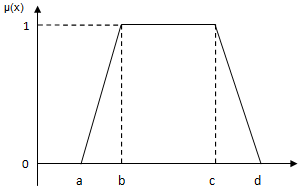
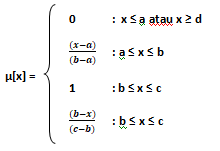
Sistem ini juga menggunakan fungsi Segitiga, dimana a,b, dan c merupakan batas-batas dari himpunan fuzzy
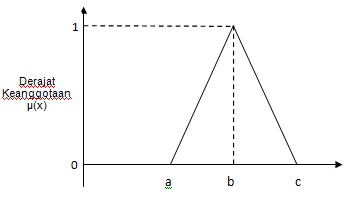
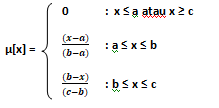

Karena kita akan menggunakan kurva trapesium dan segitiga, maka fungsi yang akan digunakan adalah `fuzz.trimf` dan `fuzz.trapmf` lalu untuk mendefinisikan domainnya, digunakan `variabel.universe` yang selanjutnya memasukkan batas-batasnya (domain), formatnya adalah `[batas awal, titik puncak, batas akhir)`. Perintahnya adalah:
`variabel['nama himpunan fuzzy'] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])`
`variabel['nama himpunan fuzzy'] = fuzz.trapmf(variabel.universe, [batas awal, titik puncak, batas akhir,batas akhir])`

### MEMBERSHIP FUNCTION DAN NILAI LINGUISTIK HARGA
Untuk harga ponsel, membership function dibagi menjadi 3 bagian :
$$ Harga Ponsel $$
$$ Murah = 100 - 4000 $$
$$ Normal = 2000 - 8000 $$
$$ Mahal = 4000 - 20000 $$

Jika harga ponsel adalah variabel linguistik, maka nilai linguistik untuk variabel 'harga' yaitu murah, normal, dan mahal. Maka membership function dirumuskan sebagai berikut:
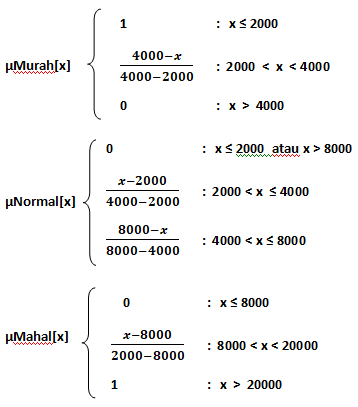

In [247]:
harga['murah'] = fuzz.trapmf(harga.universe, [100,100,2000,4000]) #dari 1 hingga 40
harga['normal'] = fuzz.trimf(harga.universe, [2000,4000,8000]) #dari 20 hingga 80
harga['mahal'] = fuzz.trapmf(harga.universe, [4000,8000,20000,20000]) #dari 40 hingga 200

### PLOTTING MEMBERSHIP FUNCTION HARGA

Plotting membership function $\mu Murah(x)$

Text(0.5, 1.0, 'Murah (Rp)')

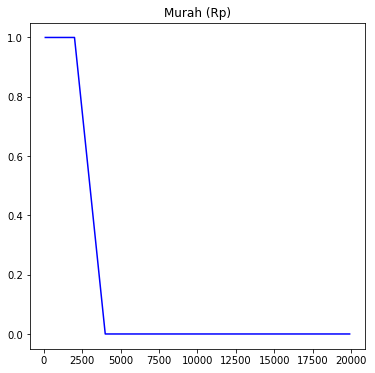

In [248]:
harga_murah = fuzz.trapmf(harga_x,[100,100,2000,4000])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(harga_x,harga_murah,'blue')
ax0.set_title('Murah (Rp)')

Plotting membership function $\mu Normal(x)$

Text(0.5, 1.0, 'Normal (Rp)')

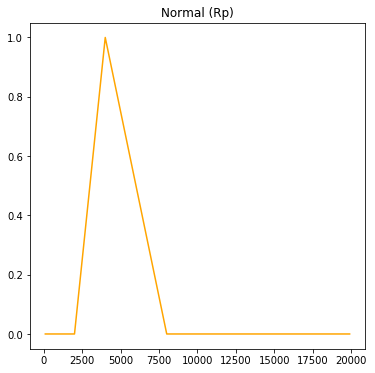

In [249]:
harga_normal = fuzz.trimf(harga_x,[2000,4000,8000])
fig2, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(harga_x,harga_normal,'orange')
ax1.set_title('Normal (Rp)')

Plotting membership function $\mu Mahal(x)$

Text(0.5, 1.0, 'Mahal(Rp)')

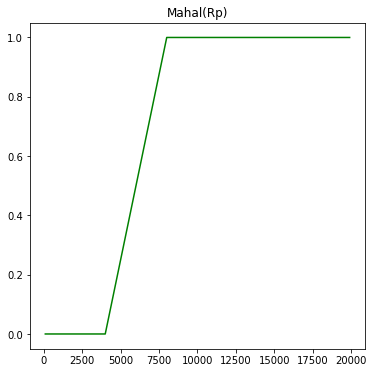

In [250]:
harga_mahal = fuzz.trapmf(harga_x,[4000,8000,20000,20000])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(harga_x,harga_mahal,'green')
ax0.set_title('Mahal(Rp)')

Plotting keseluruhan membership function

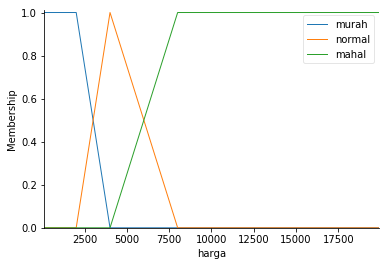

In [251]:
harga.view()

### MEMBERSHIP FUNCTION DAN NILAI LINGUISTIK KAMERA
Untuk kualitas kamera, membership function dibagi menjadi 3 bagian :
$$ Kamera $$
$$ Buram = 1 - 2 $$
$$ Sedang = 1 - 4 $$
$$ Jernih = 2 - 6 $$

Jika kamera ponsel adalah variabel linguistik, maka nilai linguistik untuk variabel 'kamera' yaitu buram, sedang, dan jernih. Maka membership function dirumuskan sebagai berikut:
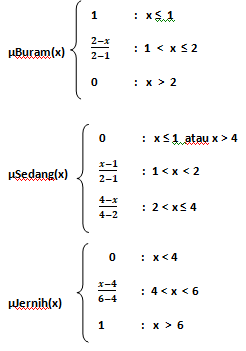

In [252]:
kamera['buram'] = fuzz.trapmf(kamera.universe, [1,1,1,2])
kamera['sedang'] = fuzz.trimf(kamera.universe, [1,2,4])
kamera['jernih'] = fuzz.trapmf(kamera.universe, [2,4,6,6])

### PLOTTING MEMBERSHIP FUNCTION KAMERA

Plotting membership function $\mu Buram(x)$

Text(0.5, 1.0, 'Buram')

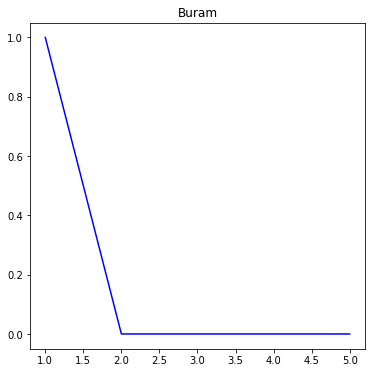

In [253]:
kamera_buram = fuzz.trapmf(kamera_x,[1,1,1,2])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kamera_x,kamera_buram,'blue')
ax0.set_title('Buram')

Plotting membership function $\mu Sedang(x)$

Text(0.5, 1.0, 'Sedang')

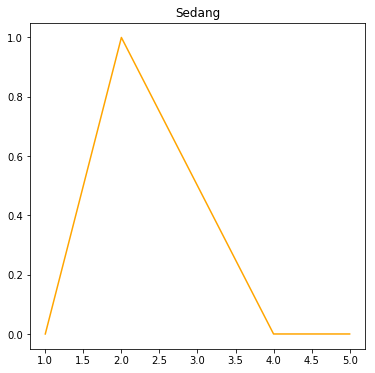

In [254]:
kamera_sedang = fuzz.trimf(kamera_x,[1,2,4])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kamera_x,kamera_sedang,'orange')
ax0.set_title('Sedang')

Plotting membership function $\mu Jernihx)$

Text(0.5, 1.0, 'Jernih')

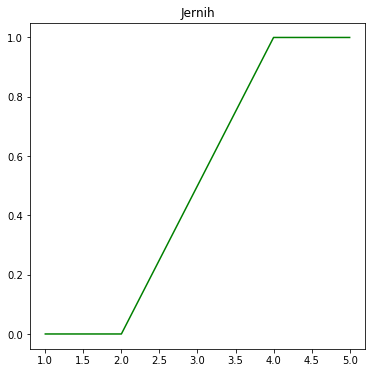

In [255]:
kamera_jernih = fuzz.trapmf(kamera_x,[2,4,6,6])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kamera_x,kamera_jernih,'green')
ax0.set_title('Jernih')

Plotting keseluruhan membership function

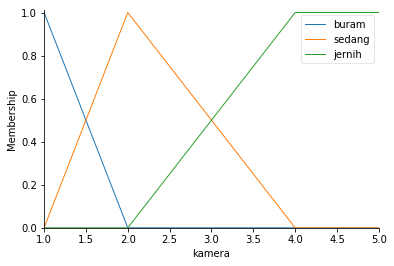

In [256]:
kamera.view()

## D. Membership Function dan Nilai Linguistik Untuk Output

### MEMBERSHIP FUNCTION DAN NILAI LINGUISTIK PEMILIHAN PONSEL 

Untuk pemilihan ponsel, membership function dibagi menjadi 3 bagian :
$$ Pemilihan Ponsel $$
$$ Kurang Direkomendasi = 1 - 40 $$
$$ Dipertimbangkan = 20 - 80 $$
$$ Sangat Direkomendasi = 40 - 100 $$

Jika pemilihan ponsel adalah variabel linguistik, maka nilai linguistik untuk variabel 'pemilihan_ponsel' yaitu kurang direkomendasi, dipertimbangkan, dan sangat direkomendasi. Maka membership function dirumuskan sebagai berikut:
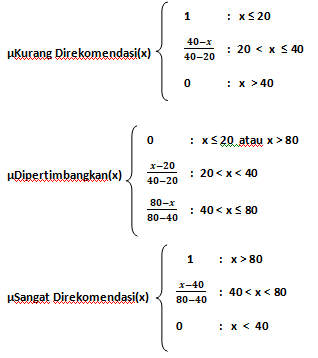

In [257]:
pemilihan_ponsel['kurang direkomendasi'] = fuzz.trapmf(pemilihan_ponsel.universe, [1,1,20,40])
pemilihan_ponsel['dipertimbangkan'] = fuzz.trimf(pemilihan_ponsel.universe, [20,40,80])
pemilihan_ponsel['sangat direkomendasi'] = fuzz.trapmf(pemilihan_ponsel.universe, [40,80,100,100])

### PLOTTING MEMBERSHIP FUNCTION PEMILIHAN PONSEL

Plotting membership function $\mu Kurang Direkomendasi(x)$

Text(0.5, 1.0, 'Kurang Direkomendasi')

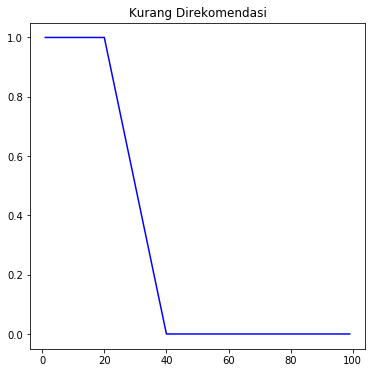

In [258]:
pemilihan_kurangdirekomendasi = fuzz.trapmf(pemilihan_x,[1,1,20,40])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(pemilihan_x,pemilihan_kurangdirekomendasi,'blue')
ax0.set_title('Kurang Direkomendasi')

Plotting membership function $\mu Dipertimbangkan(x)$

Text(0.5, 1.0, 'Dipertimbangkan')

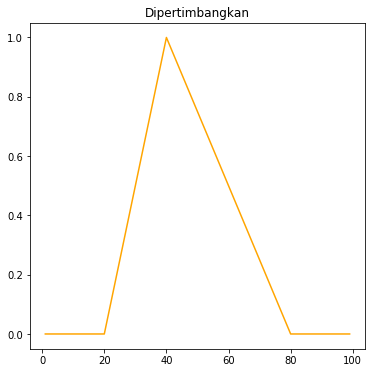

In [259]:
pemilihan_dipertimbangkan = fuzz.trimf(pemilihan_x,[20,40,80])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(pemilihan_x,pemilihan_dipertimbangkan,'orange')
ax0.set_title('Dipertimbangkan')

Plotting membership function $\mu Sangat Direkomendasi(x)$

Text(0.5, 1.0, 'Sangat Direkomendasi')

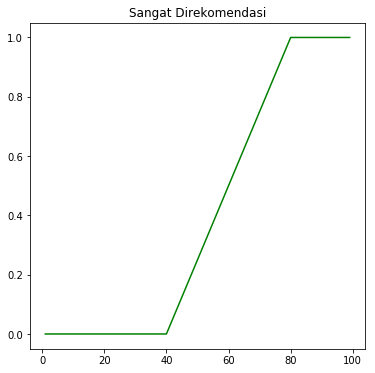

In [260]:
pemilihan_sangatdirekomendasi = fuzz.trapmf(pemilihan_x,[40,80,100,100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(pemilihan_x,pemilihan_sangatdirekomendasi,'green')
ax0.set_title('Sangat Direkomendasi')

Plotting keseluruhan membership function

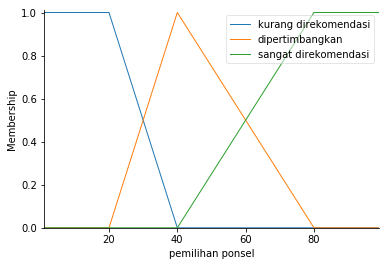

In [261]:
pemilihan_ponsel.view()

# RULE BASE

Rule Base merupakan suatu sistem berbasis aturan dari suatu perangkat lunak yang menyajikan keahlian pakar dalam bentuk aturan-aturan pada suatu domain tertentu untuk menyelesaikan suatu permasalahan. 
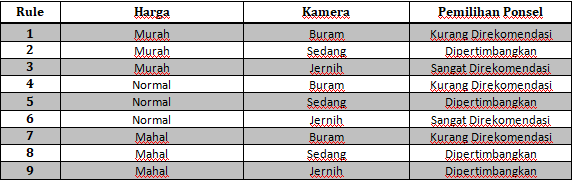

In [262]:
rule1 = ctrl.Rule(harga['murah'] & kamera['buram'], pemilihan_ponsel['kurang direkomendasi'])
rule2 = ctrl.Rule(harga['murah'] & kamera['sedang'], pemilihan_ponsel['dipertimbangkan'])
rule3 = ctrl.Rule(harga['murah'] & kamera ['jernih'], pemilihan_ponsel['sangat direkomendasi'])
rule4 = ctrl.Rule(harga['normal'] & kamera ['buram'], pemilihan_ponsel['kurang direkomendasi'])
rule5 = ctrl.Rule(harga['normal'] & kamera ['sedang'], pemilihan_ponsel['dipertimbangkan'])
rule6 = ctrl.Rule(harga['normal'] & kamera ['jernih'], pemilihan_ponsel['sangat direkomendasi'])
rule7 = ctrl.Rule(harga['mahal'] & kamera ['buram'], pemilihan_ponsel['kurang direkomendasi'])
rule8 = ctrl.Rule(harga['mahal'] & kamera ['sedang'], pemilihan_ponsel['dipertimbangkan'])
rule9 = ctrl.Rule(harga['mahal'] & kamera ['jernih'], pemilihan_ponsel['dipertimbangkan'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cc823c0b00>)

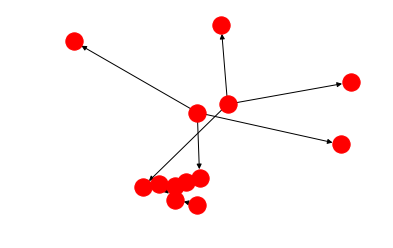

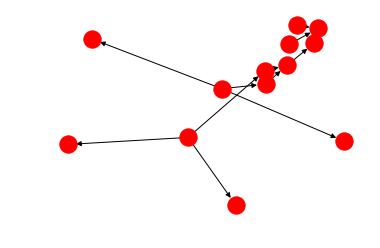

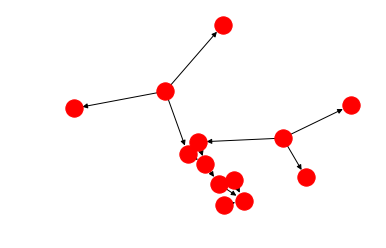

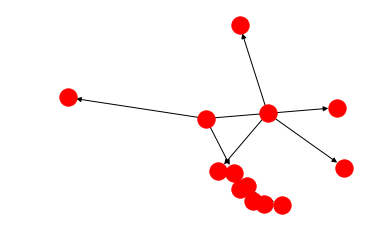

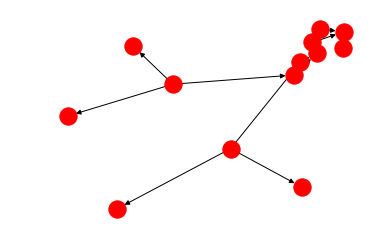

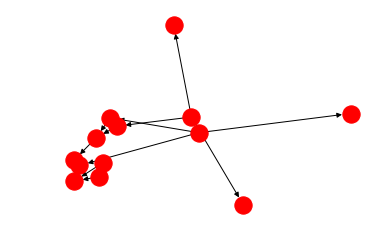

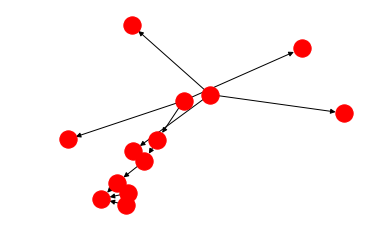

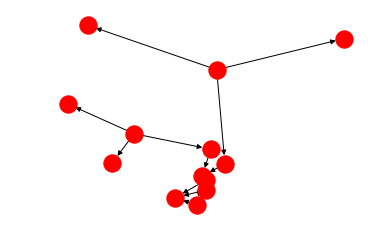

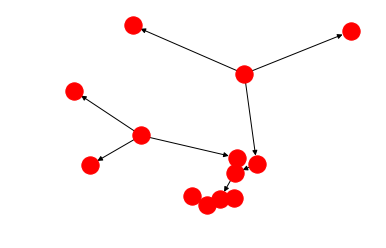

In [263]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

## Menggabungkan semua rule untuk dijadikan sebagai control system

In [264]:
pemilihan = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

## Menggunakan Mode Simulasi

In [265]:
pemilihan = ctrl.ControlSystemSimulation(pemilihan)

# MEKANISME INFERENSI
Suatu algoritma yang tidak bergantung pada suatu masalah tertentu yang digunakan untuk menentukan kesimpulan-kesimpulan atau menjalankan tindakan-tindakan menggunakan knowledge base (dasar pengetahuan).

Karena sebelumnya kita sudah melakukan proses fuzzyfikasi, selanjutnya kita akan cocokkan dengan perhitungan manualnya. Berikut ini contoh kasus yang akan menjadi sampel percobaan perhitungan.

### Contoh Kasus 

   **Dari data spesifikasi telepon sellular diambil data merek Vitell V711 dimana sampel Harga Rp 4.000.000 dan Kamera 1.3 MP**

Jika dilihat pada himpunan fuzzy, nilai 4000(=Rp 4.000.000) pada variabel harga berada di himpunan fuzzy **murah** dan **normal**, sedangkan untuk nilai 1.3 pada variabel kamera berada di himpunan **buram** dan **sedang**.

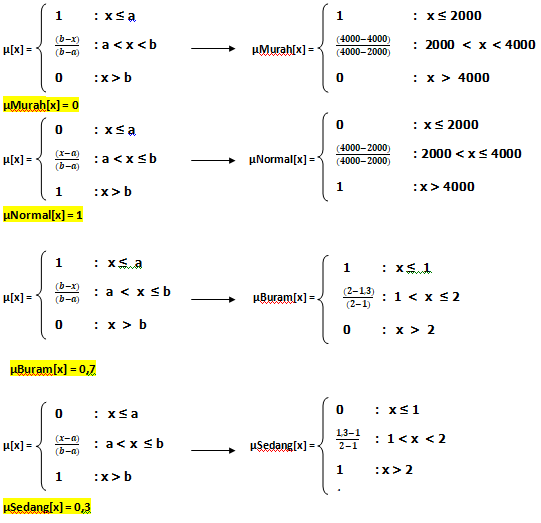

# EVALUASI RULE BASE

Selanjutnya adalah mencari fungsi implikasi dan diikuti defuzzyfikasi. Pada metode mamdani, fungsi implikasi yang digunakan adalah MIN atau menggunakan nilai minimum. Diambil dari rule based, maka ada 2 rule yang digunakan, yaitu:

   [RULE 4] IF Harga **NORMAL** *(1)* dan Kamera **BURAM** *(0.7)* THEN pemilihan **KURANG DIREKOMENDASI** *(0.7)*

   [RULE 5] IF Harga **NORMAL** *(1)* dan Kamera **SEDANG** *(0.3)* THEN pemilihan **DIPERTIMBANGKAN** *(0.3)*

Maka bisa kita tuliskan bahwa,

   [RULE 4] **a1** = *0.7*
        
   [RULE 5] **a2** = *0.3*


# DEFUZZYFIKASI 

## A. Perhitungan Manual 

Berikut adalah perhitungan manual dari contoh kasus diatas menggunakan **METODE HITUNG LUAS SAMPLING**.

Berdasarkan plot hasil output dapat dilakukan pengarsiran wilayah sampling yang dapat dicari menggunakan rumus berikut ini

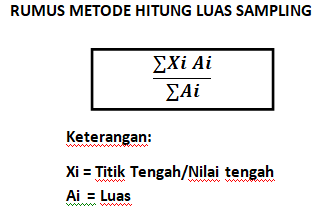

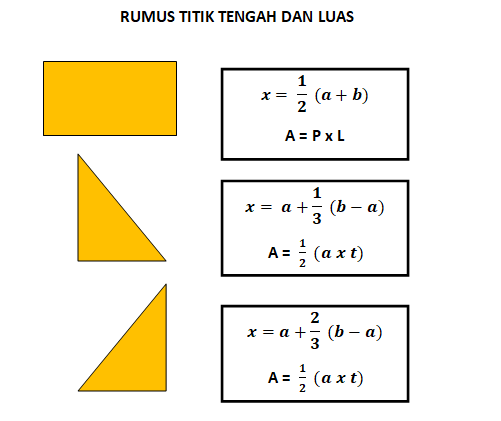

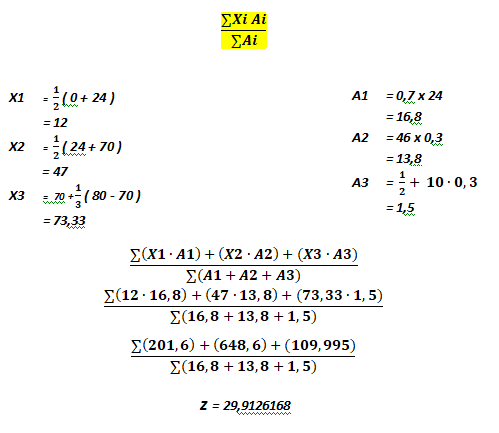

## B. Perhitungan Komputasi 

Berikut adalah perhitungan **KOMPUTASI** maka perintahnya adalah sebagai berikut:

#### Berdasarkan soal, kita masukkan input harga 4000(=Rp 4.000.000) dan kamera 1.3 

In [266]:
pemilihan.input['harga'] = 4000
pemilihan.input['kamera'] = 1.3

#### Melakukan perhitungan defuzzifikasi

In [267]:
pemilihan_akhir = pemilihan.compute()

In [268]:
pemilihan_akhir = pemilihan.output['pemilihan ponsel']
print ("Perhitungan hasil komputasi = %.3f" % pemilihan_akhir)

Perhitungan hasil komputasi = 29.968


Perhitungan persentase **akurasi** antara perhitungan manual dengan perhitungan hasil komputasi

In [269]:
z = 29.912616
akurasi = pemilihan_akhir*100/z
error = 100-akurasi
print ("Akurasi = %.3f" % akurasi + " %")
print ("Error = %.3f" % error  + " %")

Akurasi = 100.184 %
Error = -0.184 %


#### Plotting membership function pemilihan ponsel setelah dilakukan perhitungan defuzzifikasi output nilai pada pemilihan

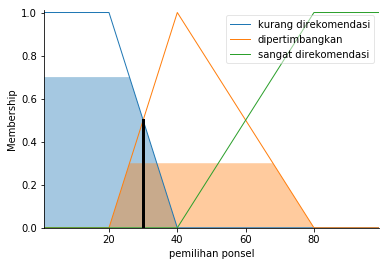

In [270]:
pemilihan_ponsel.view(sim=pemilihan)

Setelah melihat perhitungan diatas , maka dapat disimpulkan bahwa keputusan dalam pemilihan ponsel (X) tersebut tergolong pada keputusan **Kurang Direkomendasi**